## Assignment 1: Street View 


Team details {-}
Add the names of all team members and a short description of each member's contributions.

TEAM MEMBER 1 = Yme van der Linden

TEAM MEMBER 2 = Angela Cha

TEAM MEMBER 3 = Perry van Asseldonk

TEAM MEMBER 4 = Irfan Ahmed

TEAM MEMBER 5 = Merel Ypinga

In [0]:
#Handle necessary imports
%matplotlib inline
#!pip install openml # Uncomment to run in Google Colab
#import openml as oml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Download Streetview data. Takes a while the first time.
SVHN = oml.datasets.get_dataset(41081)
X, y, cats, attrs = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

In [0]:
y = [x-1 for x in y] # Correcting label
y = np.asarray(y) # converting list to np array

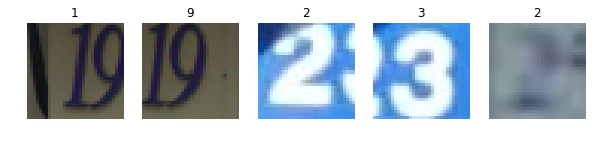

In [0]:
# Plots image. Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    if grayscale:
        [ax.imshow(X[n].reshape(32, 32)/255, cmap='gray')
         for n,ax in enumerate(axes)]
    else:
        [ax.imshow(X[n].reshape(32, 32, 3)/255) for n,ax in enumerate(axes)]
    [ax.set_title((y[n]+1)) for n,ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]
plot_images(X[0:5], y[0:5]);

## 1. Evaluate different models (15 points)

- Take a stratified 10% subsample of the data. Plot the distribution of the classes (as a histogram) for both the original data and the subsample.

In [0]:
#Take a stratified 10% subsample of the data.
#Use train_test_split in a "clever" way to generate 10% stratified sub-sample:
X_90_percent, X_10_percent, y_90_percent, y_10_percent = train_test_split(X, y, test_size=0.1, stratify=y, random_state=47)

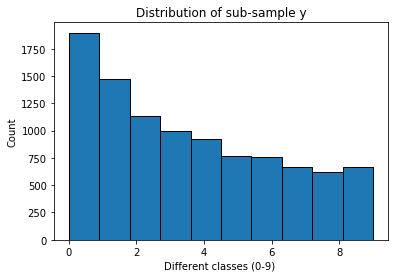

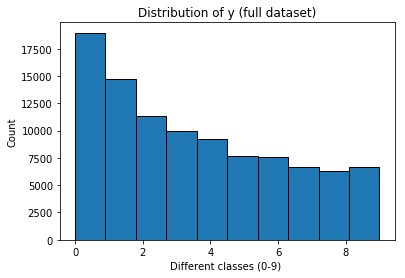

In [0]:
 
#Plot the distribution of the classes (as a histogram) for both the original data and the subsample.

plt.hist(y_10_percent, bins=10, histtype='bar', edgecolor='black')         #Histogram of Sub-sample
plt.title("Distribution of sub-sample y")
plt.xlabel("Different classes (0-9) ")
plt.ylabel("Count")
plt.show();

plt.hist(y, bins=10, histtype='bar', edgecolor='black')                    #Histogram of original data
plt.title("Distribution of y (full dataset)")
plt.xlabel("Different classes (0-9) ")
plt.ylabel("Count")
plt.show();


- valuate k-Nearest Neighbors, Logistic Regression and Linear SVM on this sample, using their default hyperparameter settings.
  - Use cross-validation with 3 folds, output the training accuracy and test accuracy including the standard deviations

In [0]:
#Evaluate k-Nearest Neighbors, using default hyperparameter settings. Use cross-validation with 3 folds, 
#output the training accuracy and test accuracy including the standard deviations

#Initialize default knn classifier
knn = KNeighborsClassifier()

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(knn, X_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True) # svc for LinearSVC(), logisticReg for LogisticRegression()

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))             
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) 
print("Testing accuracy of models {}".format(scores['test_accuracy']))               
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      

## Results
### KNN

Training accuracy of models [0.56695889 0.566853   0.57104031]

Standard deviation of training accuracies are 0.001949440450662831

Testing accuracy of models [0.35194688 0.34833837 0.34361766]

Standard deviation of Training accuracies 0.0034104761232712894

### Linear SVM

Training accuracy of models [0.25483676 0.28750567 0.3410841 ]

Standard deviation of training accuracies are 0.03555357471789143

Testing accuracy of models [0.19740417 0.14410876 0.12220206]

Standard deviation of Training accuracies 0.0315799882585887

### Logistic Regression

Training accuracy of models [0.73473398 0.74074634 0.76506115]

Standard deviation of training accuracies are 0.013111047167566734

Testing accuracy of models [0.15725928 0.16344411 0.15668482]

Standard deviation of Training accuracies 0.0030599590356461034


- Discuss the results. Are they what you expected? Are the models over/underfitting? What does the standard deviation tell you? Do you think you can get better results with more training data?



As only 10% of the dataset was utilized, we expected that the models would generally overfit. This was observed for all three models – kNN, logistic regression, and SVM – where the training accuracy was higher than the testing accuracy. This was especially the case for logistic regression, and the least for SVM. For kNN, we suspect that we observed slight overfitting due to the default k-neighbor being set as 5. Using few neighbors may have resulted in a model that is too complex and overfits the training data. For logistic regression, it makes sense that we observed the most overfitting due to its high dimensional space. It also makes sense that we observed the least overfitting in SVM, because SVMs tend to be resistant to over-fitting due to regularization.  
The standard deviations for the training and testing accuracy over the three models were all relatively low: for kNN < 0.0034, for logistic regression < 0.013, and for SVM < 0.035. While low standard deviation suggests that the means of the cross-validation scores are relatively close – thus, low variance and low chance of overfitting – our case shows that low standard deviation doesn’t necessarily mean not overfitting. We know that the models are overfitting based on the testing and training accuracy, which allows us to conclude that despite only using 10% of the dataset, the number of instances is still quite large for our models. It is possible that the points are just close to each other, hence the low standard deviation. 
Given the contradiction between what the training and testing accuracy scores suggest (overfitting) and what the standard deviation suggests (less chance of overfitting), it is hard to say whether more training data will yield better results. However, since our final conclusion is that our models are overfitting, we expect that using more training data will generally increase the accuracy of the models and reduce the chance of overfitting. 


# 2. Learning curves (20 points)

- Start with a 1% stratified subsample of the original data. Train all 3 classifiers and record both the accuracy (same as above) and the training time.
- Repeatedly add 1% more statified data (don't take a completely new 2% subsample). Measure accuracy and training time again.
- Continue to at least 10% of the original data. Plot the results as a line graph, with training set size on the x-axis and accuracy and training time, respectively, on the y-axes.
  - If the algorithms are sufficiently fast, you can continue to 100% as well.

In [0]:
#Evaluate Logistic regression, using default hyperparameter settings. 
#Use cross-validation with 3 folds, output the training accuracy and test accuracy including the standard deviations

logisticReg = LogisticRegression()

test_accuracy_list = []
test_accuracy_std_list = []
time_execution_list = []
training_percentages = [1,2,3,4,5,6,7,8,9,10]

for i in range(1,11):
    start = time.time()
    scores = cross_validate(logisticReg, X_10_percent[:i*992], y_10_percent[0:i*992], cv=3, scoring=['accuracy'], n_jobs=-1) # knn for KNeighborsClassifier()
    test_accuracy_list.append(scores['test_accuracy'])                                                                       # svc for LinearSVC()
    test_accuracy_std_list.append(scores['test_accuracy'].std())
    stop = time.time()
    duration = stop-start
    time_execution_list.append(duration)
    print("Training complete on {}% subsample of data".format(i))


plt.subplot(2,1,1)
plt.plot(training_percentages, test_accuracy_list, '-o')
plt.title('Testing accuracy and training times plot')
plt.xlabel("Percentage of data used")
plt.ylabel("Testing accuracy")

plt.subplot(2,1,2)
plt.plot(training_percentages,time_execution_list , '-o')
plt.xlabel("Percentage of data used")
plt.ylabel("Execution time in seconds")
plt.show()

### LogisticReg plot

NOTE TO MR. VANSCHOREN!!! We made a sign mistake while plotting the execution times. We did start - stop instead of stop - start! Therefore all the times are now plotted negative. While we know that we made a mistake, generating the plots took a very long time; and therefore we hope you can forgive us for this minor mistake (The only thing that changed is that the curves are now "upside down". 

![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q2/logreg_plot.png)

### KNN plot

![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q2/knn_plot.png)

### Linear SVM plot

![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q2/svm_plot.png)

- Discuss the results. Are they what you expected? Are the model over/underfitting? What does the standard deviation tell you? Do you think you can get better results with more training data?

kNN was the fastest model which is expected since kNN typically trains very quickly. Logistic regression was the slowest model. According to the results, kNN’s testing accuracy greatly improved when using more data, while logistic regression and SVM did not seem to show a clear pattern of improving. 
Based on the learning curves, kNN is the most promising as the three curves almost overlap and remain consistent with each other. Testing accuracy is smoothly increasing with more data, so less overfitting is being observed. Contrary to this, we observed quite random learning curves for logistic regression and SVM – making it hard to even determine over/underfitting based on the learning curves alone. 
Because the learning curve is starting to plateau for kNN already, we suspect that more data would not be as beneficial for kNN compared to logistic regression and SVM with their more random learning curves. Therefore, more data would benefit logistic regression and SVM the most. 


## 3. Data representation (20 points) 

- Convert the images to grayscale (use the function below). Check whether the conversion is correct by plotting a few of the converted images.

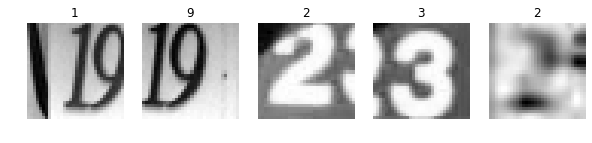

In [0]:
def rgb2gray(X, dim=32):
    return np.squeeze(np.expand_dims(np.dot(X.reshape(len(X), dim * dim, 3), [0.2990, 0.5870, 0.1140]), axis=3))

X_gray = rgb2gray(X)

def plot_images(X, y):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    [ax.imshow(X[n].reshape(32, 32)/255, cmap='gray') for n,ax in enumerate(axes)]
    [ax.set_title((y[n]+1)) for n,ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]
    plt.show()

plot_images(X_gray[0:5], y[0:5]) #Conversion is correct

- Is the grayscale representation better than the color representation? Does it yield better models? Why (not)? Run the necessary experiments and discuss. For instance, compare the performance of models trained on both representations.


The gray scale representation is not much better than the color representation (if not worse) and did not yield a significantly better model. Only kNN yielded a slightly better training and testing accuracy, while logistic regression and SVM observed a slight decrease in training and testing accuracy (with the exception of the testing accuracy of logistic regression which showed a slight increase). 

In [0]:
# To check the difference in performance, we compare the results of different models with the results obtained in question 1.
# Since results of Q1 were already obtained, we simply run the same models as we did in Q1, but now on the grayscale data.
# Alongside test accuracy we also generate the training accuracy and standard deviations again as they could provide us with
# Some useful insights about the training process.
# Also generate a new test split
X_gray_90_percent, X_gray_10_percent, y_90_percent, y_10_percent = train_test_split(X_gray, y, test_size=0.1, stratify=y, random_state=47)

In [0]:
#Initialize default knn classifier
knn = KNeighborsClassifier()
#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(knn, X_gray_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True) # svc for LinearSVC()
                                                                                                                   # logisticReg for LogisticRegression()
#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) 
print("Testing accuracy of models {}".format(scores['test_accuracy']))               
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))    

## Results
### KNN

Training accuracy of models [0.58388755 0.58951503 0.58417636]

Standard deviation of training accuracies are 0.002587437567413254

Testing accuracy of models [0.38182916 0.37190332 0.37295826]

Standard deviation of Training accuracies 0.004451316268125431

### Linear SVM

Training accuracy of models [0.21886336 0.15017374 0.27298807]

Standard deviation of training accuracies are 0.0502561302222925

Testing accuracy of models [0.19076366 0.08429003 0.15184513]

Standard deviation of Training accuracies 0.043988605644834984

### LogisticReg

Training accuracy of models [0.51647521 0.50536335 0.52272384]

Standard deviation of training accuracies are 0.0071794893845586565

Testing accuracy of models [0.16571084 0.16042296 0.16485178]

Standard deviation of Training accuracies 0.002316944266840829

------------------------------------------------------------------

- Afterwards, normalize the data by substracting the mean of the pixel values from every image and dividing by the standard deviation of every image.
  - Note: Do this for every image independently. Don't compute means or standard deviations over the entire training/test set
  - Again, check whether you have done it correctly by plotting some of the converted images.
  - Is the new representation better? Why (not)? Run the necessary experiments and discuss.

In [0]:
X_90_percent, X_10_percent, y_90_percent, y_10_percent = train_test_split(X, y, test_size=0.1, stratify=y, random_state=47)

#First we Normalize the entire X_gray data, 
def std_function(X_data):
    std_array = np.zeros(X_gray.shape)
    for counter, value in enumerate(X_10_percent):
        std_array[counter] = (X_data[counter] - np.mean(X_data[counter]))/ np.std(X_data[counter])
    return std_array

X_gray_std = std_function(X_gray)
np.save('Standardized grayscale array', X_gray_std)

#Generate new (Normalized, grayscaled), with same random_state so the split should be similar to the ones used before. 
#X_gray_std_90_percent, X_gray_std_10_percent, y_90_percent, y_10_percent = train_test_split(X_gray_std, y, test_size=0.1, stratify=y, random_state=47)

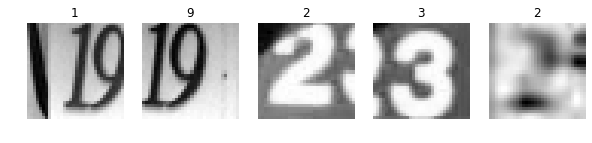

In [0]:
plot_images(X_gray_std[0:5], y[0:5])

This new representation performed even worse than the previous. Training and testing accuracy decreased significantly for kNN and logistic regression. While SVM observed a slight increase in training accuracy, it also observed a slight decrease in the testing accuracy; thus, resulting in an even larger discrepancy between training and testing accuracy.

In [0]:
#Initialize default knn classifier
knn = KNeighborsClassifier()

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(knn, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True) # logisticReg for LogisticRegression()
                                                                                                                       # svc for LinearSVC()
#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) 
print("Testing accuracy of models {}".format(scores['test_accuracy']))               
print("Standard deviation of testing accuracies {}".format(scores['test_accuracy'].std()))       

## Results
### KNN

Training accuracy of models [0.22626965 0.22314549 0.22482259]

Standard deviation of training accuracies are 0.0012765845615265684

Testing accuracy of models [0.20464835 0.20151057 0.20205687]

Standard deviation of testing accuracies 0.0013686943501351149

### Linear SVM

Training accuracy of models [0.27055623 0.26333283 0.26921335]

Standard deviation of training accuracies are 0.003136900231944167

Testing accuracy of models [0.18472683 0.18187311 0.18632789]

Standard deviation of testing accuracies 0.001842466435379235

### Logistic Regression

Training accuracy of models [0.26647521 0.26227527 0.26725049]

Standard deviation of training accuracies are 0.0021856456454752266

Testing accuracy of models [0.18563236 0.181571   0.18663037]

Standard deviation of testing accuracies 0.0021880463397819902

----------------------------------------------------------------------------

- Finally, run PCA (Principal Component Analysis) on the data and see if that gives you a better (lower-dimensional) representation. Note that you need to use a pipeline here to avoid data leakage between your training and test set (see Tutorial 3).
  - Try different numbers of components or use a solver to guess the optimal number of components
  - Is the new representation better? Why (not)? Run the necessary experiments and discuss.

In [0]:
#The following code was used to try different components. Results were saved to disk, and inspected later 
#(See markdown cells below). We did this so we didn't have to run every model seperately for every n_components tried.

for i in [20,40,60,80,160,320]:
    #Create the pipeline, print steps to see if it works correctly 
    pipeline= Pipeline([("PCA", PCA(n_components=i, svd_solver='auto')), ("knn", knn)]) #("svc", svc) for SVM #("logreg", logisticReg) for LogisticRegression
    print(pipeline.named_steps["PCA"])                                                  
    scores = cross_validate(pipeline, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)
    
    
    #Report training accuracy + std, testing accuracy + std, and save it to disk as a dictionary, using the pickle module
    results_dict = {'train_acc': scores['train_accuracy'], 'train_std' : scores['train_accuracy'].std(), 'test_acc': scores['test_accuracy'], 'test_std':scores['test_accuracy'].std()}
    f = open("filepath/classifier_specified_pca_score{}factors.pkl".format(i), "wb") #e.g. knn_pca_score20factors.pkl
    pickle.dump(results_dict, file)
    f.close()

In [0]:
#The following code was used to check whether or not PCA gives us a better representation, and inspect
#The accuracies at different numbers of components.

f = open('C:/Users/Yme/Documents/MEGA/Master DSE/Data Mining/Assignments/Assignment 1/cache/logreg_pca_score320factors.pkl', "rb")
cv_results = pickle.load(f)
print(np.mean(cv_results['test_acc'])) #knn 20 factors: 0.19378
print(cv_results)

The mean test accuracy is significantly lower than previous testing accuracies for kNN and slightly lower for linear SVM. PCA is showing some small improvements for logistic regression with regards to testing accuracy. Given this, we conclude that the new representation with PCA is slightly better for logistic regression, but still exhibits overfitting when taking the training accuracies into consideration . 

- knn 20 factors: 0.19378 #Mean test accuracy 
- knn 40 factors: 0.19318 
- knn 60 factors: 0.19126 
- knn 80 factors: 0.19066 
- knn 160 factors:0.17715 
- knn 320 factors: 0.1518

---------------------------------------

- svm 20 factors: 0.18954 
- svm 40 factors: 0.18863 
- svm 60 factors: 0.18612 
- svm 80 factors: 0.18579 
- svm 160 factors:0.18450 
- svm 320 factors:0.18340

---------------------------------------

- logreg 20 factors: 0.19005 
- logreg 40 factors: 0.19085 
- logreg 60 factors: 0.18894 
- logreg 80 factors: 0.18692 
- logreg 160 factors:0.18561 
- logreg 320 factors:0.18380

## 4. Regularization (20 points) {-}

- Tune the algorithm's main regularization hyperparameter on the 10% stratified subsample using the normalized grayscale representation. These are the misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN.

- We expect the optimum for the C parameters to lie in $[10^{-12},10^{12}] and for n_neighbors between 1 and 50. C should be varied logarithmically, n_neighbors linearly.
- Run a grid search over these ranges, using 3-fold cross-valdation, and plot both the training and test error. Start with a coarse grid (e.g. 5 values per hyperparameter), use a finer grid for the 'interesting' regions (where performance changes) if training time allows.
- Plot the effect of every one of the hyperparameters (both the training and test score). Discuss the plots. For which values is the model over/underfitting? Is there a sweet spot?
- Evaluate the optimized models (the best hyperparameter settings) on the rest of the (unseen) data and discuss your findings. Do the results generalize? If not, what can/ should you do? Discuss. Run additional experiments if it helps you confirm your claims.

In [0]:
#First, we generate the code for doing the GridSearch. We pickle the cv.results_ dictionary, 
#so we can use it for plotting the GridSearchCV's. We did dit, for if something went wrong with the plotting,
#We didn't have to run the models all over again. param_grid_c and param_grid_n were used to generate the plots
#(First we did course hyperparameter searches, then we narrowed them down according to the plot results)

param_grid_c_coarse = {'C': [1e-12, 1e-6, 1e-4, 1e-2, 1e-1, 1, 1e1, 1e2, 1e4, 1e6, 1e12]}
param_grid_c_narrow = {'C': [1e-5 ,1e-4, 1e-3, 1e-2 ,1e-1 ,1, 1e2, 1e3, 1e4, 1e5]}

param_grid_n_narrow = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
param_grid_n_coarse = {'n_neighbors': [5,15,25,35,45]}

#In GridSearchCV we use the default cross-validation, as it implements Stratified K-folds cross-validation with three folds.
# From documentation: For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, 
#StratifiedKFold is used. We save the results produced by grid.cv_results_ to disk, for using in the plotting later. 
#We did this so that when an error was made in our plotting, we did not have to run the model all over again, but could load
#the results from disk (which is obviously much faster. )
grid = GridSearchCV(knn, param_grid=param_grid_c_narrow, n_jobs=-1,              #knn, svc, or logistricReg for different models 
                    cv=None, scoring=['accuracy'], return_train_score=True, refit='accuracy')
grid.fit(X_gray_std_10_percent, y_10_percent)                                    #fit the GridSearch

cvresults_forfile = grid.cv_results_
f = open("cvresults_file.pkl","wb")                
pickle.dump(cvresults_forfile,f) 
f.close()

In [0]:
#Code used to generate the plots for models. For every model, we used this block of code to first do a course grid-search, 
#and then narrow it down and do a fine grid search. 
results_file = open('cvresults_file.pkl','rb')
cv_results_ = pickle.load(results_file)
results_file.close()

param_grid_c_coarse = {'C': [1e-12, 1e-6, 1e-4, 1e-2, 1e-1, 1, 1e1, 1e2, 1e4, 1e6, 1e12]}
param_grid_c_narrow = {'C': [1e-5 ,1e-4, 1e-3, 1e-2 ,1e-1 ,1, 1e2, 1e3, 1e4, 1e5]}

param_grid_n_narrow = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
param_grid_n_coarse = {'n_neighbors': [5,15,25,35,45]}

plt.subplot(2,1,1)
plt.title('Training and testing accuracies for KNN in a Grid Search')        #Or SVM, Logistic regression
plt.plot(param_grid_c_narrow, cv_results_['split0_train_accuracy'], '-o')    #Or other param_grids depending on which model
plt.plot(param_grid_c_narrow, cv_results_['split1_train_accuracy'], '-o')
plt.plot(param_grid_c_narrow, cv_results_['split2_train_accuracy'], '-o')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3'], loc='lower left')
plt.xlabel("Number of neighbors")                                            #or C
plt.ylabel("Training Accuracy")

plt.subplot(2,1,2)
plt.plot(param_grid_c_narrow, cv_results_['split0_test_accuracy'], '-o')
plt.plot(param_grid_c_narrow, cv_results_['split1_test_accuracy'], '-o')
plt.plot(param_grid_c_narrow, cv_results_['split2_test_accuracy'], '-o')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3'], loc='lower left')
plt.xlabel("Number of neighbors")
plt.ylabel("Testing Accuracy")
plt.show()

#### knn_gridsearch_coarse
![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q4/knn_gridsearch_coarse.png)

#### knn_gridsearch_fine

![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q4/knn_gridsearch_fine.png)

#### logreg_gridsearch_coarse

![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q4/logreg_gridsearch_coarse.png)

#### logreg_gridsearch_fine

![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q4/logreg_gridsearch_fine.png)

#### svm_gridsearch_coarse

![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q4/svm_gridsearch_coarse.png)

#### svm_gridsearch_fine

![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Plots%20Q4/svm_gridsearch_fine.png)

We initially started with a coarse grid search on each of the models. We then selected the point of highest accuracy and performed a finer grid search around the maximum (“optimal”) value.

For kNN, we observed that the model reaches its highest accuracy between 0 and 10 neighbors. Upon doing a fine grid search, we can clearly see that the training and testing accuracy converge at about 5 neighbors. At this point, the training and testing accuracy scores are relatively close to each other (training ~ 0.23 and testing ~ 0.2) but suggest slight overfitting. With more than 4 neighbors, the model starts to lose accuracy, indicating underfitting due to simplicity. With less than 5 neighbors, there are too few neighbors and the model overfits due to high complexity. Given the plots, we conclude that the “sweet spot” for kNN is around 5 neighbors. The plots for kNN between training and testing accuracy remain consistent with each other, which suggests that this model generalizes well. 

For logistic regression, we observed that the model reaches its highest accuracy between C = 10^-5 and 10^5 . Upon doing a fine grid search, we observe that the training and testing accuracy reaches an optimal point at around C = 10^-3 . At this point, the training and testing accuracy scores are relatively close to each other (training ~ 0.21 and testing ~ 0.192) but suggest slight overfitting. As mentioned in Q1, because logistic regressions have a high dimensional space, they have a tendency to overfit. Given the plots, we conclude that the “sweet spot” for logistic regression is at approximately at C = 10^-3 . The plots for logistic regression are quite consistent compared with each other (with regards to just training or just testing) but the training and testing accuracy diverges after the “sweet spot”. Thus, we conclude that this model generalizes to some degree up to C = 10^-3 . 

For SVM, we observe that the model reaches its highest accuracy between C = 10^-5 and 10^5 . Upon doing a fine grid search, we observe that the training and testing accuracy reaches an optimal point at around C = 10^-1 . At this point, the training and testing accuracy scores are the closest to each other (training ~ 0.26 and testing ~ 0.18), but still suggest overfitting and show the greatest difference among the three models tested. The plots for SVM between training and testing accuracy are somewhat consistent with each other, but experience some divergence, therefore conclude that this model generalizes to some degree, but not as well as kNN. 



### 5. Interpreting misclassifications (10 points) {-}

- Chances are that your best model is not 100% accurate. Plot a few of the misclassified examples and their predicted and correct labels. Discuss. Are these indeed 'hard' examples that are easy to get wrong?
- Plot the confusion matrix. Which digits are often confused with each other? Which digits are easier/harder to classify? Discuss.

In [0]:
# working on 10% sub-sample of X_gray_std
# Generating new Train Test split

X_train,X_test,y_train,y_test = train_test_split(X_gray_std_10_percent, y_10_percent, test_size=0.1, stratify=y_10_percent, random_state=47)

Text(0.5, 1.0, 'Accuracy Score: 0.2054380664652568')

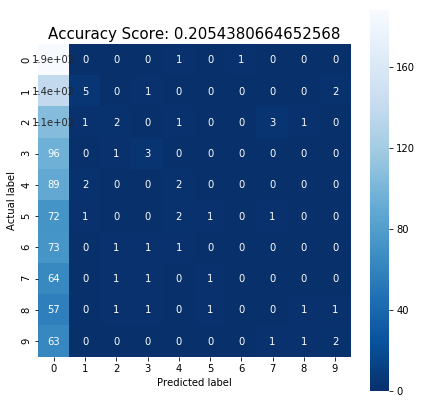

In [0]:
clf = KNeighborsClassifier()  # LinearSVC() for linearSVM , LogisticRegression() for Logistic Regression

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

score = clf.score(X_test, y_test)

#Make Confusion matrix using seaborn

cm = metrics.confusion_matrix(y_test,predicted)

plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True,square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

When we observe the confusion matrix for our best model (KNN) we notice something interesting; the model is primarily predicting zeros. This is not positive because we can conclude that the model is not well trained and it has trouble recognizing almost all numbers except zero.

Looking at the classifications aside from the zeros we can see that there were additional numbers which the model had problems with. These numbers are "six" and "seven". The model was not capable of predicting these correctly once. We do think that these numbers can be classified as more difficult numbers because of their high similarity to other numbers.

Additionally, interesting results can be concluded from the number "two". After inspecting the confusion matrix we can see that it got this number mostly confused with the number "seven". This makes sense because the number is similar to "seven" and we would therefore also classify it as a number which is difficult to group.


### Linear SVM



![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/LinearSVM.png)

### Logistic Regression


![alt text](https://raw.githubusercontent.com/Psychotechnopath/Datamining_assignments/master/Assignment%201/Logistic%20Regression.png)

### 6. Interpreting models (15 points) {-}

- Try to understand what the linear models have learned by looking at their model parameters. Are there features (pixels) that are more important than others? What does that tell you?


In [0]:
X_90_percent, X_10_percent, y_90_percent, y_10_percent = train_test_split(X_gray_std, y, test_size=0.1, stratify=y, random_state=47)

In [0]:
X_10_percent.shape

(9929, 1024)

In [0]:
m = LogisticRegression()
m.fit(X, y)

# The estimated coefficients will all be around 1:
image_array_1 = m.coef_
print(m.coef_[0])


[ 0.47163168 -0.39094832  0.0993154  ... -0.09898981  0.21611951
 -0.16733087]


In [0]:
m_2 = LinearSVC()
m_2.fit(X, y)

# The estimated coefficients will all be around 1:
image_array_2 = m_2.coef_
print(m_2.coef_[0])


[ 0.29903521 -0.26873379  0.10861715 ...  0.05286977  0.06225514
 -0.09097683]


In [0]:
image_array_1 = np.abs(image_array_1).sum(axis=0)
image_array_2 = np.abs(image_array_2).sum(axis=0)

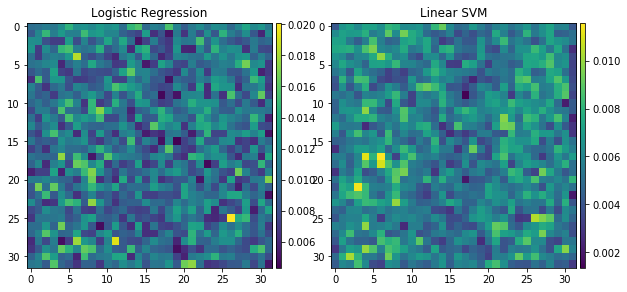

In [0]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

image_arrays = [image_array_1,image_array_2]

# [ax.imshow(X[n].reshape(32, 32)/255, cmap='gray')

def plot_feature_importance_images(image_arrays, image_titles):
    fig, axes = plt.subplots(1,2, figsize=(10,8))
    for i, ax in enumerate(axes):
        ax.set_title(image_titles[i])
        pos = ax.imshow(image_arrays[i].reshape(32, 32)/255)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.05)
        fig.colorbar(pos, cax=cax)
        
plot_feature_importance_images(image_arrays, ["Logistic Regression","Linear SVM"])

We can clearly see a difference in the colors of the pixels, which indicates that there is a difference in importance between them.  


For example, for the Logistic Regression certain pixels on the side are valued more important than ones in the middle. We would argue that this is a negative sign for the model. Mainly because you would expect that pixels in the middle contain the more important information. Also, the pixels' importance looks rather random which is something we don't like but would explain its poor results.

The SVC model looks like it does better and focuses more on the center compared to the Logistic Regression. However, pixels in the middle are mostly valued lower then the pixels on the side which is not what we would expect. Despite this, the SVC plot seems significantly less random compared to the Logistic Regression plot.

- Visualize the model parameters of the best (tuned) models as a 32x32 matrix, for each class individually. This means training 10 models in a one-vs-all fashion. Does this help you understand what the model is paying attention to?


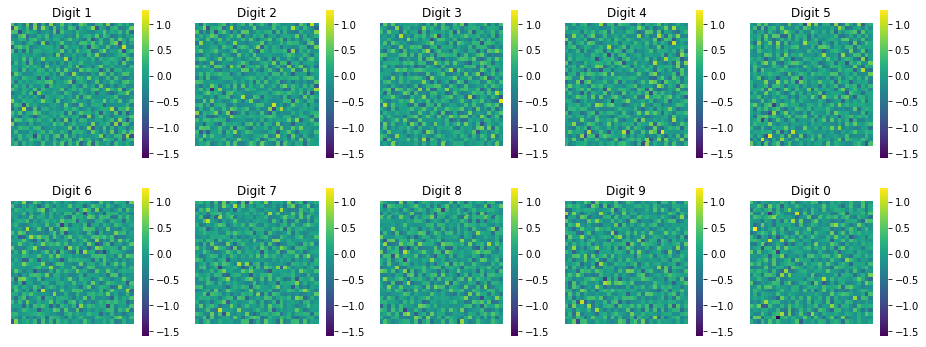

In [0]:
Classifier = LogisticRegression()
Classifier.fit(X_gray_std,y)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 6))
axes = axes.reshape(-1)

vmin = np.min(Classifier.coef_)
vmax = np.max(Classifier.coef_)

for i, label in enumerate(Classifier.classes_):
  coef = np.reshape(Classifier.coef_[i], (32, 32))
  
  sns.heatmap(coef, cmap='viridis', cbar=True, xticklabels=[], yticklabels=[],
             ax=axes[i], square=True, vmin=vmin, vmax=vmax)
  axes[i].set_title('Digit {}'.format((label+1) % 10))

After plotting the 32x32 matrix for each class individually we obtained interesting results. We can more clearly see what features the model gives importance to. However, the results are not in favor of the model. The matrix confirms our opinion from question 6a where we stated that it mainly looks like random pixels which have a higher importance instead of certain areas in an image that are valued higher.

We think that the standardization of the data is one of the causes of our poor results because this led to a significant loss of valuable information.


- Do the same for an underfitted and an overfitted version of logistic regression. What changes? Is the model paying attention to different parts of the image now?

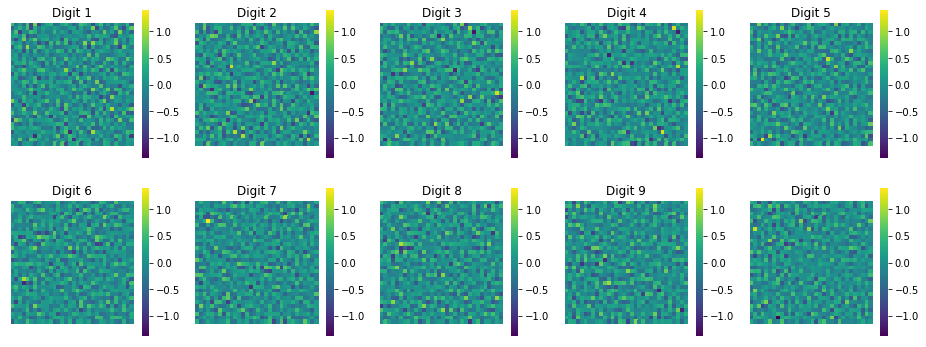

In [0]:
# Underfitting by taking train test split as 50-50

X_50_train, X_50_test, y_50_train, y_50_test = train_test_split(X_gray_std, y, test_size=0.5, stratify=y, random_state=47)

# Logistic Regression

Clf = LogisticRegression()
Clf.fit(X_50_train,y_50_train)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 6))
axes = axes.reshape(-1)

vmin = np.min(Clf.coef_)
vmax = np.max(Clf.coef_)

for i, label in enumerate(Clf.classes_):
  coef = np.reshape(Clf.coef_[i], (32, 32))
  
  sns.heatmap(coef, cmap='viridis', cbar=True, xticklabels=[], yticklabels=[],
             ax=axes[i], square=True, vmin=vmin, vmax=vmax)
  axes[i].set_title('Digit {}'.format((label+1) % 10))

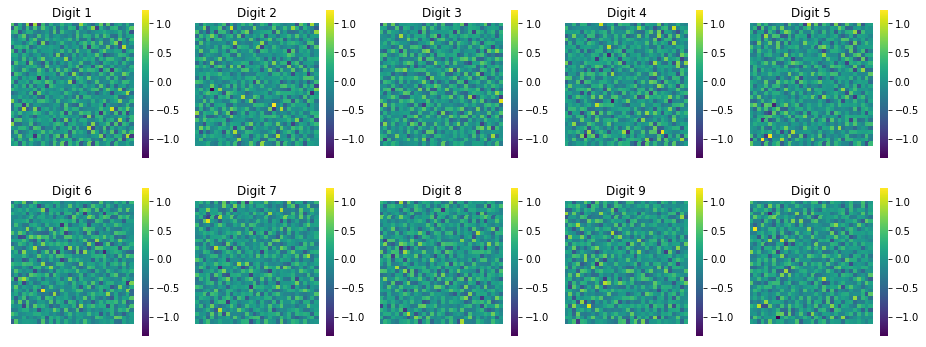

In [0]:
# Overfitting by taking train test split as 90-10

X_90_train, X_10_test, y_90_train, y_10_test = train_test_split(X_gray_std, y, test_size=0.1, stratify=y, random_state=47)

# Logistic Regression

Clf = LogisticRegression()
Clf.fit(X_90_train,y_90_train)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 6))
axes = axes.reshape(-1)

vmin = np.min(Clf.coef_)
vmax = np.max(Clf.coef_)

for i, label in enumerate(Clf.classes_):
  coef = np.reshape(Clf.coef_[i], (32, 32))
  
  sns.heatmap(coef, cmap='viridis', cbar=True, xticklabels=[], yticklabels=[],
             ax=axes[i], square=True, vmin=vmin, vmax=vmax)
  axes[i].set_title('Digit {}'.format((label+1) % 10))

Plotting an underfitted and overfitted version did not give us many different insights. The pixels still appear to be random, and we cannot observe any large areas which the model values higher. An interesting difference we see between the plot from question 6b is the fact that the under- and overfitted models do not give values lower than -1 whereas the model in question 6b goes as low as -1.5. We can explain this however, by the fact that we adjusted the size of training and test set which lead to the models in question 6c to have less data which it trained on and thus has learned less.